# Weighted and Non-Linear Regression Analysis
---

## Regression Recap

In this course so far we have covered lots of essential skills needed for data analysis in the lab setting, however we have been working on a couple of assumptions:

1. The data we are working in has no error bars or the error bars are all the same size.
2. The data we are modelling can easily be linearised for us to perform a simple linear regression. 

In reality, it is often the case that one or both of these assumptions are incorrect. In today's session we are going to look at how we may use Python to perform normal and *weighted* regression analysis on linear and non-linear datasets. 

Before we move on to look at these concepts, you may wish to review the materials from last semester about simple linear regression. 

---

## Weighted Linear Regression

As mentioned previously, so far in our linear regression analysis we have considered data that is *homoscedasitic*. We now want consider how we would modify our regression analysis for data points that have associated errors of differing sizes (*hetroscedasitic* data). 

The plot below shows hetroscedasitic data. The data appears to be linear, but there are some small deviations from linearity. If you were to fit a line of best fit to this data by hand would you want it to lie closer to the data points with small error bars or large error bars?

We would want the data points with the smaller error bars to have a greater weighting in our regression analysis as these values are measured to a higher preision! **We must perform a weighted linear regression!**

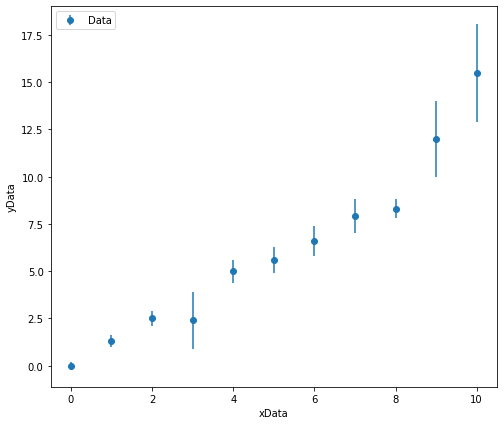

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

xData = np.array([0,1,2,3,4,5,6,7,8,9,10])
yData = np.array([0, 1.3, 2.5, 2.4, 5 ,5.6 ,6.6, 7.9, 8.3, 12, 15.5])
yError = np.array([0.2, 0.3, 0.4, 1.5, 0.6, 0.7, 0.8, 0.9, 0.5, 2, 2.6])

plt.figure(figsize=(8,7))
plt.errorbar(xData, yData, yerr = yError, marker = 'o', linestyle = ' ', label = 'Data')
plt.xlabel('xData')
plt.ylabel('yData')
plt.legend(loc = 2)
plt.show()

### Weighted Linear Regression Calculations

Now that we know why we would perform a weighted linear regression, we must ask "how do we do this mathematically?". 


First, let's recall the equations we used in a simple linear regression to determine the gradient and intercept of the line of best fit. These values of gradient and intercept are calculated by minimising the residuals (the discrepency between the model fit and actual data).

The gradient of the line of best fit from a simple linear regression is determined using the equation:

\begin{equation}
     m = \frac{N\sum{(x_i \cdot y_i)} - \sum{x_i} \cdot\sum{y_i}}{N\sum{\left(x_i^2\right)} - \sum{\left(x_i\right)}^2},
\end{equation}

and the intercept of the line of best fit could be determined using:

\begin{equation}
    c = \frac{\sum{y_i} - m\sum{x_i}}{N}.
\end{equation}

If we then want to perform a weighted linear regression, these equations may be modified to include a "*weighting factor*", $w_i$. The the gradient of the line of best fit from a weighted regression may be determined using the equation:


\begin{equation}
    m = \frac{\sum w_i \sum (w_i x_i y_i) - \sum (w_i x_i) \sum (w_i y_i)}{\sum w_i \sum \left(w_i x_i^2 \right) - \left( \sum (w_i x_i) \right)^2},
\end{equation}


and the error associated with this gradient is calculable using:


\begin{equation}
    \Delta m = \sqrt{\frac{\sum w_i}{\sum w_i \sum \left(w_i x_i^2 \right) - \left( \sum (w_i x_i) \right)^2}}.
\end{equation}


The intercept of the line of best fit from a weighted regression is determined using using the equation:


\begin{equation}
    c = \frac{ \sum (w_i x_i^2) \sum (w_i y_i) - \sum (w_i x_i) \sum (w_i x_i y_i)}{\sum w_i \sum \left(w_i x_i^2\right) - \left( \sum (w_i x_i) \right)^2},
\end{equation}


and the error associated with this intercept is calculable using:


\begin{equation}
    \Delta c = \sqrt{\frac{\sum \left(w_i x_i^2\right)}{\sum w_i \sum \left(w_i x_i^2 \right) - \left( \sum (w_i x_i) \right)^2}}.
\end{equation}


In order to evalute these equations, we must first determine the weighting factor for each value. The weighting factor must minimize the impact that data points with large associated error bars have on the overall fit - therefore the weighting factor must be small for large associated uncertainties and large for small associated uncertainties. Accordingly the weighting factor for each data point is defined as:

\begin{equation}
 w_i = \frac{1}{\Delta y_i^2},
\end{equation}

where $\Delta y_i$ represents the uncertainty associated with a given data point in the y-direction. In other texts, $\alpha$ is used to represent the uncertainty rather than $\Delta$. 


### Weighted Linear Regression Comparison

Now that we know how to perform a simple linear regression and weighted linear regression, let us compare the difference between the two lines of best fit we get for the data plotted above.

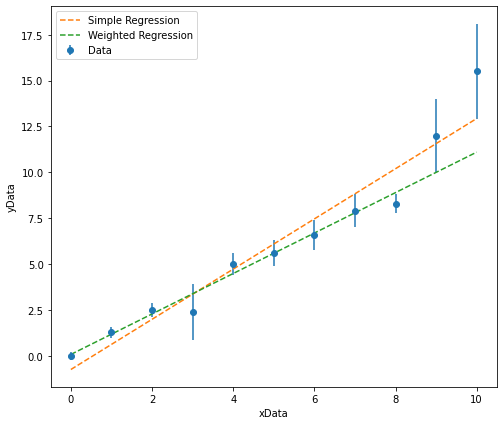

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit

def weightedLinearRegression(xData, gradient, intercept):
    y = gradient*xData + intercept
    return y

xData = np.array([0,1,2,3,4,5,6,7,8,9,10])
yData = np.array([0, 1.3, 2.5, 2.4, 5 ,5.6 ,6.6, 7.9, 8.3, 12, 15.5])
yError = np.array([0.2, 0.3, 0.4, 1.5, 0.6, 0.7, 0.8, 0.9, 0.5, 2, 2.6])

results = linregress(xData, yData)
#print(results.intercept)

popt, pcov = curve_fit(weightedLinearRegression, xData, yData, sigma = yError)

plt.figure(figsize=(8,7))
plt.errorbar(xData, yData, yerr = yError, marker = 'o', linestyle = ' ', label = 'Data')
plt.plot(xData, results.slope*xData + results.intercept, marker = ' ', linestyle = '--', label = 'Simple Regression')
plt.plot(xData, popt[0]*xData + popt[1], marker = ' ', linestyle = '--', label = 'Weighted Regression')
plt.xlabel('xData')
plt.ylabel('yData')
plt.legend(loc = 2)
plt.show()


results = linregress(xData, yData)
#print(results.intercept)


It is clear from looking at this plot that the simple linear regression results in a line of best fit where the distance between the line and any given data point (the residual) has been minimised, but when we take into account the magnitude of thr associated errors, the line of best fit from the weighted regression is much more closely aligned with the data points with smaller associated uncertainties. 

---

## Non-Linear Regression

It is likely that all of the expeirments that you have performed in the experimental labs thus far have required you to be able to fit to a linear dataset. This may have required you to linearise your data by rearranging an equation into a $y =mx+c$ format which is simple to do in many cases, however in many instances it is difficult to do this. In these circumstances it would be far easier to fit a non-linear model to the data. 

A "non-linear model" simply means we are not longer fitting a straight line of best fit to determine the optimal values for the gradient and intercept. Instead, we will be optimising the values of other parameters. For example, if I wanted to fit a model to data that follows a normal distribution, I may fit it using a Gaussian profile: 

\begin{equation}
 f(x) = a e^{-\frac{(x-b)^2}{2c^2}},
\end{equation}

where $a$ represents the height of the distribution, $b$ represents the mean value of the distribution, and $c$ represents the standard deviation of the distribution. 

The plot below shows a some generated data (this is a gaussian distribution with additional noise added to make it more representative of the sort of data that may be obtained experimentally). Prior to the noise being added to this data, the Gaussian was defined to have a height of 50, a mean value of 150 and a standard deviation of 25.

Using a non-linear fitting routine, I am able to extract values of the parameters $a$, $b$ and $c$. For example:

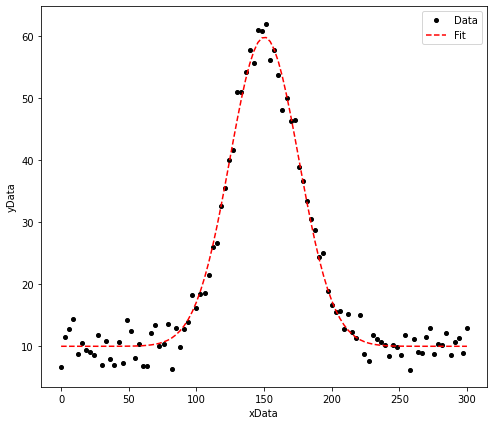

The height of this distribution is equal to:  49.8 +/- 0.7 

The mean value of this distribution is equal to:  150.2 +/- 0.4 

The standard deviation of this distribution is equal to:  25.5 +/- 0.4 



In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def NoisyGaussian(xData, a, b, c, d):
    y = a * np.exp((-1*(xData-b)**2)/(2*c**2))
    noise = np.random.normal(0,2,100)
    y = y + noise + d
    return y

def Gaussian(xData, a, b, c, d):
    y = a * np.exp((-1*(xData-b)**2)/(2*c**2)) + d
    return y

x = np.linspace(0,300,100)
y = NoisyGaussian(x,50,150,25,10)

popt, pcov = curve_fit(Gaussian, x, y, p0=[35,150,25, 4])
fitError = np.sqrt(np.diag(pcov))

plt.figure(figsize=(8,7))
plt.plot(x,y, marker = 'o', linestyle = ' ', markersize = '4', color = 'k', label = 'Data')
plt.plot(x, Gaussian(x, *popt), marker = ' ', linestyle = '--', color = 'r', label = 'Fit')
plt.xlabel('xData')
plt.ylabel('yData')
plt.legend()
plt.show()

print("The height of this distribution is equal to: ", np.round(popt[0],1), "+/-", np.round(fitError[0],1), "\n")
print("The mean value of this distribution is equal to: ", np.round(popt[1],1), "+/-", np.round(fitError[1],1), "\n")
print("The standard deviation of this distribution is equal to: ", np.round(popt[2],1), "+/-", np.round(fitError[2],1), "\n")


### Weighted Non-Linear Regression

When fitting the Gaussian above, I have again assumed homoscedasicity, however we can also perform a weighted non-linear regression. The key difference when performing a weighted non-linear and weighted linear regression is that we weight the residuals according to:

\begin{equation}
R_i = \frac{y_i -y_{model}}{\Delta y_i}.
\end{equation}

The fitting proceedure performed again minimises these residuals as was the case for the linear regression. 

---
## Using Curve_Fit

Hopefully you now understanding why we may use weighted and/or non-linear regression analysis. It is time to learn how to perform this analysis easily using Python. 

**It is imperative that you have an understanding of how to define a function in order to perfrom these new types of regression.** If you are not sure how to do this, review the notes from last semester (Week 2 - Functions and Modules).

Last semester we performed simple linear regression using "[linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)". Unfortunately, linregress is not sophisticated enough to perform weighted linear regressions. Instead, we are going to use "[curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)" from the [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) library. The name of curve_fit suggests that we use it for non-linear fitting, but in reality we can also use it for linear and weighted regression analysis.

![image, alt = "A screenshot of the scipy.optimize.curve_fit python documentation"](S2Wk5_Figures/Curve_Fit.png)

Looking at the Curve_Fit documentation, we can see that there are a few arguments that we must provide the function with:

- **The model function**: This is a function that we have defined to model our data, for example if we were fitting a linear dataset, the model function would simply be $y=mx+c$. It is also stated that the first arguement in this function must be the independant variable and the other function arguements must be equal to the parameters being optimized (e.g. f(xData, gradient, intercept)).



- **The x-Data**: This is simply the array of our independent variables i.e. our x-data.



- **The y-Data**: This is is an array of the corresponding dependant variables, for which the curve_fit is going to optimise the model to best represent.



- **A p0 Array**: An array of starting estimates of the parameters we are aiming to find optimal values for.  This is an optional arguement, but inclusion of starting estimates can increase the speed of the fitting routine or prevent it from giving up before finding optimized values. 



- **sigma**: If this is presented as a one-dimentional array, the array should contain the undertainties associated with each y-value. Again, this is an optional arguement but its inclusion allows us to perform weighted regression analysis. 


---
### Curve_Fit Example: Weighted Linear Regression

In this example, I will show you how we can use curve_fit to perform a weighted linear regression. The process for fitting non-linear is exactly the same, with the exception that the function used will represent a different model. 

1. Let us import the libraries and tools we are going to use for this analysis:

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

---

2. We must define the function that we are going to model to our data. 

In [5]:
def LinearRegression(xData, gradient, intercept):
    y = gradient*xData + intercept
    return y

As outlined above, the first arguement in our function is the xData, which is an array containing all of our independent variables. **This must be the first arguement in the function.** 

The gradient and intercept are the next two arguements in our function. When the function is used in curve_fit, it is these two parameters that will be optimized. If our model had additional parameters that needed optimising, we would simply add these into the function.

---

3. Next we need some data to actually fit the model too. I am going to use the same linear data used above. Although I have manually added this data, we could just as easily import experimental data into the script from a CSV file. 

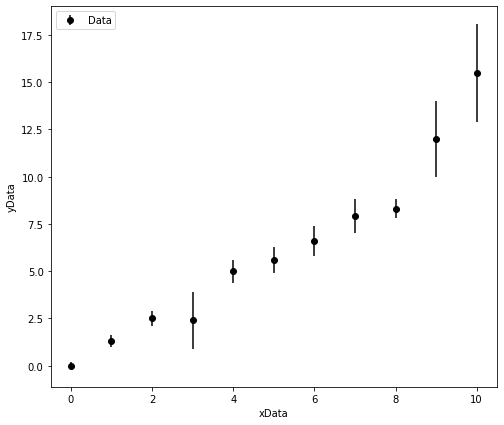

In [6]:
xData = np.array([0,1,2,3,4,5,6,7,8,9,10])
yData = np.array([0, 1.3, 2.5, 2.4, 5 ,5.6 ,6.6, 7.9, 8.3, 12, 15.5])
yError = np.array([0.2, 0.3, 0.4, 1.5, 0.6, 0.7, 0.8, 0.9, 0.5, 2, 2.6])

# We can also plot this data
plt.figure(figsize=(8,7))
plt.errorbar(xData, yData, yerr = yError, marker = 'o', linestyle = ' ', color = 'k', label = 'Data')
plt.xlabel('xData')
plt.ylabel('yData')
plt.legend(loc = 2)
plt.show()

---

4. Finally now we can use curve_fit to determine the optimised model parameters.

In [7]:
popt, pcov = curve_fit(LinearRegression, xData, yData, sigma = yError, p0 = [1.5, -0.7])

Let us break down what this line of code does:

- **popt**: This is an array containing our optimised model parameters (**P**arameters **opt**imial = popt). In this case the gradient and intercept of our line of best fit. The first value in this array popt[0] will correspond to the optimised value of the first parameter in the model function e.g the gradient in this case.



- **pcov**: This is a covariance array from which we can determine the errors associated with the optimised model parameters. This is outlined in the documenation and the calculation is performed in the code below (perr = np.sqrt(np.diag(pcov))).



- **curve_fit**: This is where we have called the curve_fit function. 



- **LinearRegression**: This is the function we defined above. In this case, it tells curve_fit that we are going to perform a linear regression. If we were optimising a different model, this function would define a different model e.g. a Gaussian Function or an exponential function. 
    
    
- **xData**: This is the x-data that we are feeding into the function. 
    
    
    
- **yData**: This is the y-data that we are feeding into the function and that the model will be optimised to best represent. 
    
    
- **sigma = yError**: Here we are telling curve_fit which array of values to assign as the errors associated with the y-values to use when performing the weighted regression. If we ommitted this arguement, curve_fit would simply perform an unweighted regression. 
     
     
- **p0**: This is set equal to an array/list of starting estimates for the regression analysis. As the gradient is the first arguement in our function, the first number in the array (1.5) corresponds to the starting estimate for this parameter. As the intercept is the second arguement in our function, the second number in the array (-0.7) corresponds to the starting estimate for this parameter.
    
---

5. Once we have performed the weighted regression analysis, we can output the results and add our line of best fit to our plot:

The gradient of the line of best fit is:  1.10 +/- 0.05 

The intercept of the line of best fit is:  0.1 +/- 0.1 



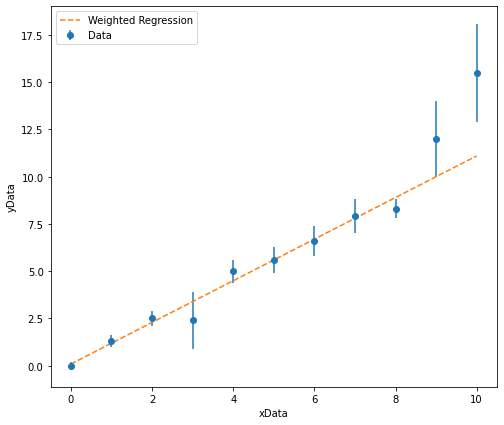

In [8]:
# Firstly, lets determine the errors associated with our optimised values from pcov.
# The formula to do this is outlined in the curve_fit documentation.
perr = np.sqrt(np.diag(pcov))

# Let us print our optimised values and uncertainties:
print("The gradient of the line of best fit is: ", '%.2f' % popt[0], "+/-", '%.2f' % perr[0], "\n")
print("The intercept of the line of best fit is: ", '%.1f' % popt[1], "+/-", '%.1f' % perr[1], "\n")

plt.figure(figsize=(8,7))
plt.errorbar(xData, yData, yerr = yError, marker = 'o', linestyle = ' ', label = 'Data')
plt.plot(xData, popt[0]*xData + popt[1], marker = ' ', linestyle = '--', label = 'Weighted Regression')
plt.xlabel('xData')
plt.ylabel('yData')
plt.legend(loc = 2)
plt.show()

In the example above, when plotting the line of best fit, the y-values are calculated using:

$$ popt[0]*xData + popt[1].$$

We did the same thing last semester. Here I have mutliplied each xData point by the optimised gradient (popt[0]) and then added the optimised intercept (popt[1]).


If my model function was more complicated, I could simply call my model function here and feed in the xData and entire popt array. I would do this using a asterisk, for example:

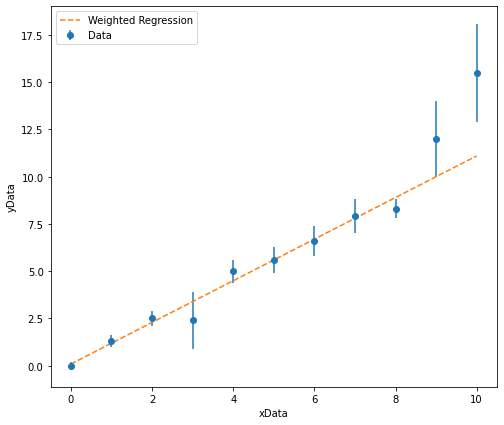

In [9]:
plt.figure(figsize=(8,7))
plt.errorbar(xData, yData, yerr = yError, marker = 'o', linestyle = ' ', label = 'Data')
plt.plot(xData, LinearRegression(xData, *popt), marker = ' ', linestyle = '--', label = 'Weighted Regression')
plt.xlabel('xData')
plt.ylabel('yData')
plt.legend(loc = 2)
plt.show()

---
###  Starting Estimates

In the example above, I performed a relatively simple regression and it was very likely that curve_fit would have been able to determine optimised values for the gradient and intercept without any problems. However, it is often the case that curve_fit will give up before it is able to fit a model to the data. If this happens we must provide starting estimates for curve_fit to begin its optimisation routine at. How do we know what good starting estimates are?

**We can plot our starting estimates to see if they make sense!**

In the example above, the line of best fit was plotted on the graph by feeding our function into plt.plot with the optimised parameters. To make sensible guesses of what our starting estimates should be we can do the same thing to sanity check that our starting estimates are reasonable. For example, take a look at the code below:

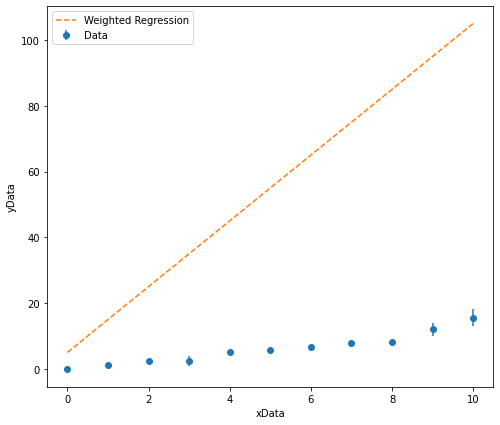

In [10]:
# Here are my starting estimates to sanity check
GradientEstimate = 10
InterceptEstimate = 5

plt.figure(figsize=(8,7))
plt.errorbar(xData, yData, yerr = yError, marker = 'o', linestyle = ' ', label = 'Data')

# Now I am going to feed in my starting estimates into plt.plot to see if they make sense. 
plt.plot(xData, LinearRegression(xData, GradientEstimate, InterceptEstimate)
         , marker = ' ', linestyle = '--', label = 'Weighted Regression')

plt.xlabel('xData')
plt.ylabel('yData')
plt.legend(loc = 2)
plt.show()

It is clear that I have overestimated what the gradient of the line of best fit should be and slightly overestimated what the intercept should be. I can now test more appropriate starting estimates.

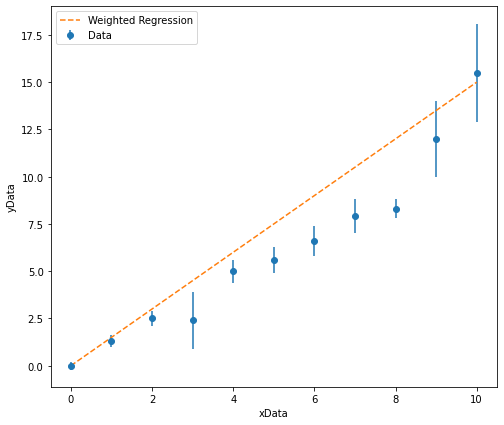

In [11]:
# I will now change my starting estimates to something more appropriate.
GradientEstimate = 1.5
InterceptEstimate = 0

plt.figure(figsize=(8,7))
plt.errorbar(xData, yData, yerr = yError, marker = 'o', linestyle = ' ', label = 'Data')

# Now I am going to feed in my starting estimates into plt.plot to see if they make sense. 
plt.plot(xData, LinearRegression(xData, GradientEstimate, InterceptEstimate)
         , marker = ' ', linestyle = '--', label = 'Weighted Regression')

plt.xlabel('xData')
plt.ylabel('yData')
plt.legend(loc = 2)
plt.show()

These starting starting estimates look much more appropriate and can be used in the regression analysis!

This is a great technique for saninty checking that your model and starting estimates are appropriate if your regression analysis does not appear to be working. 

### Upper and Lower Bounds

It is often the case that curve_fit will attempt the regression analysis but be unable to provide realistic values for the model parameters or to perform the fit becasue it requires us to narrow down an appropriate range of inital parameter values to iterate over. 

For example, you may know that a parameter you are trying to extract from your data should be positive, but curve_fit fits the data by assigning the parameter an unphysical negative value. In this case we can tell curve_fit that the parameter must be assigned a value that sits between a lower and upper bound.

In order to do this we simply add an additional arguement into curve_fit called "*bounds*", which we set equal to the lower and upper values that our parameter(s) could possibly adopt. Take a look at the example below which builds upon the weighted linear regression we performed above:

In [12]:
popt, pcov = curve_fit(LinearRegression, xData, yData, sigma = yError, p0 = [1.5, -0.7], 
                       bounds = ([0, -10],[10, 10]))

Looking at the *bounds* argument, the lower bounds of the first and second parameters in our function, the gradient and intercept, have been set to $0$ and $-10$, respectively. Similarly, The upper bounds for both parameters have been set to $10$. 

If I had additional parameters I wanted to have lower and upper limits for, I would simply add these to the lists of the lower and upper bounds. If I had five parameters to be optimised, but only included two lower and upper bounds, these limits would apply to the first two parameters in our function.

**The following activities should not require you to apply upper and lower bounds. These tend to be reserved for more complex models**.

---
## Goodness of Fit

### Calculating $\chi^2_{\nu}$

The final thing that I would like you to consider is how we assess the quality of a fit - e.g. is the model we have fit to the data any good? 

In order to do this we must calculate the reduced chi-sqaure (pronounced "kai-sqaure"), $\chi^2_{\nu}$, which provides a quantitative measure of whether a model is representative of the data it has been fit to taking into consideration the size of the error bars on the data points. 

Before we calculate the $\chi^2_{\nu}$ we must calculate $\chi^2$ (i.e. not reduced). We can do this using the following equation:

\begin{equation}
 \chi^2 = \sum{\frac{\left(y_i-y_i(x) \right) ^2}{\Delta y_i^2}},
\end{equation}

where $y_i$ is the measured value of y associated with $x_i$, $y_i(x)$ is the value of y predicted by the model for the given value of $x$ and $\Delta y_i$ is the error associated with our measured value $y_i$. To determine $\chi^2_{\nu}$, we must divide our $\chi^2$ by the number of degrees of freedom, $\nu$:

\begin{equation}
 \chi^2_{\nu} = \frac{\chi^2}{\nu}.
\end{equation}

To determine the number of degrees of freedom, $\nu$, we simply take the number of data points in our sample, $N$, and the number of parameters that we are extracting from our model, $n$:

\begin{equation}
 \nu = N - n.
\end{equation}

For example, if fitting a linear model to a dataset with $10$ data points, we are extracting $2$ parameters from the model (the gradient and the intercept), therefore the number of degrees of freedom would simply equal $8$.

### Interpretting the $\chi^2_{\nu}$

Once $\chi^2_{\nu}$ has been determined for a given model and dataset, we are able to gauge if the fit is suitible. We would expect that if the model was representative of the data and the error bars associated with the data points were an appropriate size, $\chi^2_{\nu} \approx 1$.
Considering the equation we used to calculate $\chi^2$:

\begin{equation}
 \chi^2 = \sum{\frac{\left(y_i-y_i(x) \right) ^2}{\Delta y_i^2}},
\end{equation}

A larger than 1 value of $\chi^2_{\nu}$ can be attributed to two things:

- The numerator of the equation is large, meaning that their is a large discrepency between the model and measured data (e.g. the model does not represent the trends observed in the data).


- The denominator is small, meaning that the the errors are small (check that they haven't been underestimated or miscalculated).


A smaller than 1 value of $\chi^2_{\nu}$ can be attributed to:

- A large denominator, meaning that the errors are large (again, check that they haven't been overestimated or miscalculated).

When performing analysis in a lab setting it would be useful to report and comment on the value of $\chi^2_{\nu}$ determined - it may provide insight into the limitations of your experiment which then become good points to talk about in your results and discussion section of a report. 

The value of $\chi^2_{\nu}$ can adopt a value between $0$ and $\infty$. **As a general rule of thumb, we would expect that a good fit would have a $\chi^2_{\nu}$ that falls between $0.25$ and $4$**.

---
## Activities

Having read through the materials above, I would now like you to put into practise what you have learnt by performing various linear and non-linear fitting (both weighted and non-weighted fits). Data for you to fit models to has been provided on CoCalc. You will need to import this data using an appropriate package. 

### Linear Fitting

\begin{equation}
 y = mx + c
\end{equation}


1. Perform both **simple and weighted** linear regressions on Data1.csv and Data2.csv. 
2. Create a figure containing subplots (one for each dataset) that includes both lines of best fit determined for each dataset. 
3. Write clear print statements that states the gradients and intercepts (and their associated errors) determined from each regression. 
4. Calculate the $\chi^2_{\nu}$ for the weighted linear regressions.
5. Comment on the goodness of fit.

### The Gaussian Profile

\begin{equation}
 f(x) = a e^{-\frac{(x-b)^2}{2c^2}} + d,
\end{equation}

where $a$ represents the height of the distribution, $b$ represents the mean value of the distribution, $c$ represents the standard deviation of the distribution and $d$ represents a baseline of background noise. 

1. Define a function for a Gaussian profile and perform a **weighted** non-linear regression to determine the values of $a$, $b$, $c$ and $d$ using on Data3.csv. 
2. Create a high-quality plot that shows the data and optimised model fit. 
3. Write a clear print statement that states the values of the optimised parameters and their associated errors.
4. Calculate the $\chi^2_{\nu}$ for the Gaussian fit.
5. Comment on the goodness of fit.


### The Exponential Decay

\begin{equation}
 N = N_0 e^{-\lambda t} + b,
\end{equation}

1. Define a function for the exponential decay and perform a **weighted** non-linear regression to determine the values of $N_0$, $\lambda$ and $b$ using Data4.csv.  
2. Create a high-quality plot that shows the data and optimised model fit. 
3. Write a clear print statement that states the values of the optimised parameters and their associated errors.
4. Calculate the $\chi^2_{\nu}$ for the exponential fit.
5. Comment on the goodness of fit.


### The Power Law

\begin{equation}
f(x) = x^n + b
\end{equation}

1. Define a function for the power law and perform a non-linear regression to determine the values of $n$ and $b$ using Data5.csv.
2. Create a high-quality plot that shows the data and optimised model fit. 
3. Write a clear print statement that states the values of the optimised parameters and their associated errors.

### Sine-Cosine Convolution

\begin{equation}
f(x) = A(sin(nx) + cos(mx))
\end{equation}

1. Define a function for the given wave-function and perform a non-linear regression to determine the values of $A$, $n$ and $m$ using Data6.csv. 
2. Create a high-quality plot that shows the data and optimised model fit. 
3. Write a clear print statement that states the values of the optimised parameters and their associated errors.

## Free Session

Once you have reviewed the notes above and completed the associated activities, you are welcome to use this session as you please. 